# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis was conducted to uncover key patterns, trends, and insights within the sales dataset. The following visualizations and summaries highlight significant findings that can inform business decisions and strategic planning.

---

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [30]:
df = pd.read_csv('../data/cleaned_data.csv')

In [31]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,street,city,state,state_name,zip,sales,month,month_name,year,hour,day_of_week
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",Lake St,New York City,NY,New York,10001,11.99,1,January,2019,3,Tuesday
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",Church St,San Francisco,CA,California,94016,11.95,1,January,2019,3,Tuesday
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",5th St,New York City,NY,New York,10001,150.00,1,January,2019,4,Tuesday
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",Jackson St,Dallas,TX,Texas,75001,2.99,1,January,2019,5,Tuesday
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2nd St,Atlanta,GA,Georgia,30301,23.90,1,January,2019,6,Tuesday


### **Total Sales by Month**

This bar chart illustrates monthly sales trends over the year:

- Sales **rise steadily from January to March**, signaling post-holiday recovery.
- A **decline from May to September** suggests a seasonal slowdown.
- **October rebounds**, followed by a dip in **November**, then a **sharp peak in December** — likely driven by holiday shopping and year-end promotions.

---
**Business Insight:**
Recognizing these patterns can help optimize **inventory, staffing, and marketing** during high- and low-demand months.


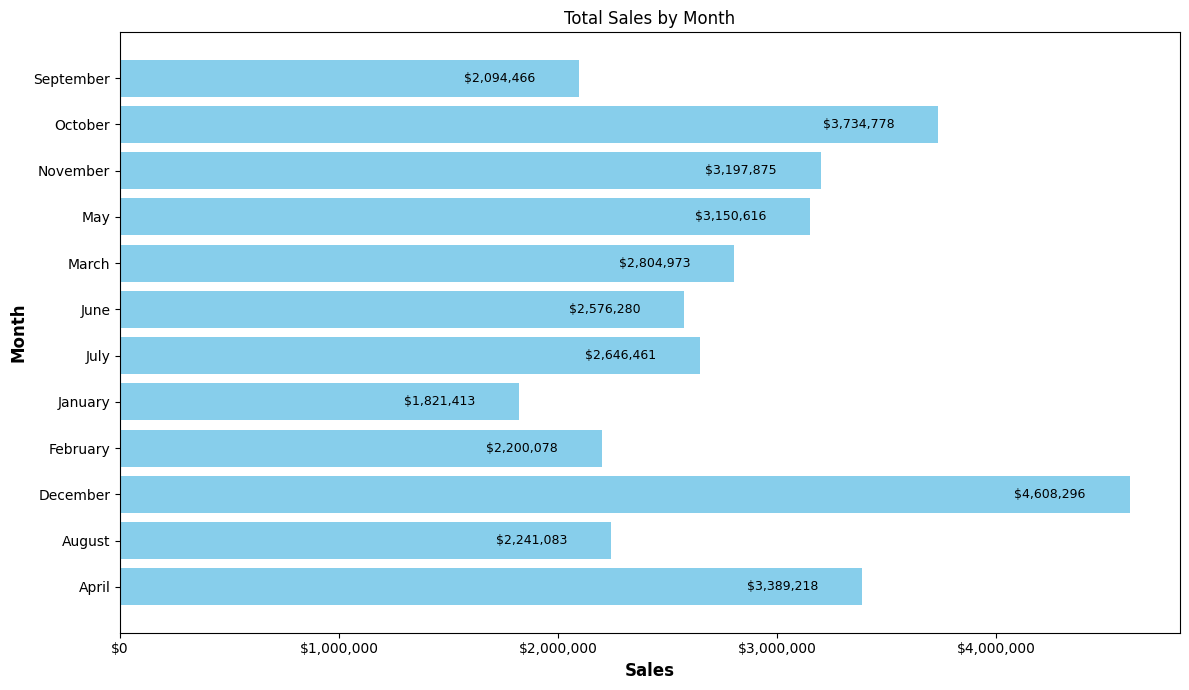

In [32]:
# Monthly sales trend

monthly_sales = df.groupby('month_name', observed=True)['sales'].sum()

plt.figure(figsize=(12, 7))

# Only plot the bars once, and keep a handle on them
bars = plt.barh(monthly_sales.index, monthly_sales.values, color='skyblue')

plt.title('Total Sales by Month')
plt.ylabel('Month', fontsize=12 ,fontweight='bold')
plt.xlabel('Sales', fontsize=12 ,fontweight='bold')

# Format x-axis as currency
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 200000,
        bar.get_y() + bar.get_height() / 2,
        f"${width:,.0f}",
        va='center',
        ha='right',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.savefig('../visuals/total_sales_by_month.png', dpi=600, bbox_inches='tight')
plt.show()

### **Top 10 Products by Sales**
This horizontal bar chart displays the 10 products that generated the highest revenue.

- High-ticket electronics and accessories dominate the top positions.

- These products may benefit from bundling strategies or promotional focus.

---
**Business Insight:**
Prioritize top-performing products in promotions and stock management

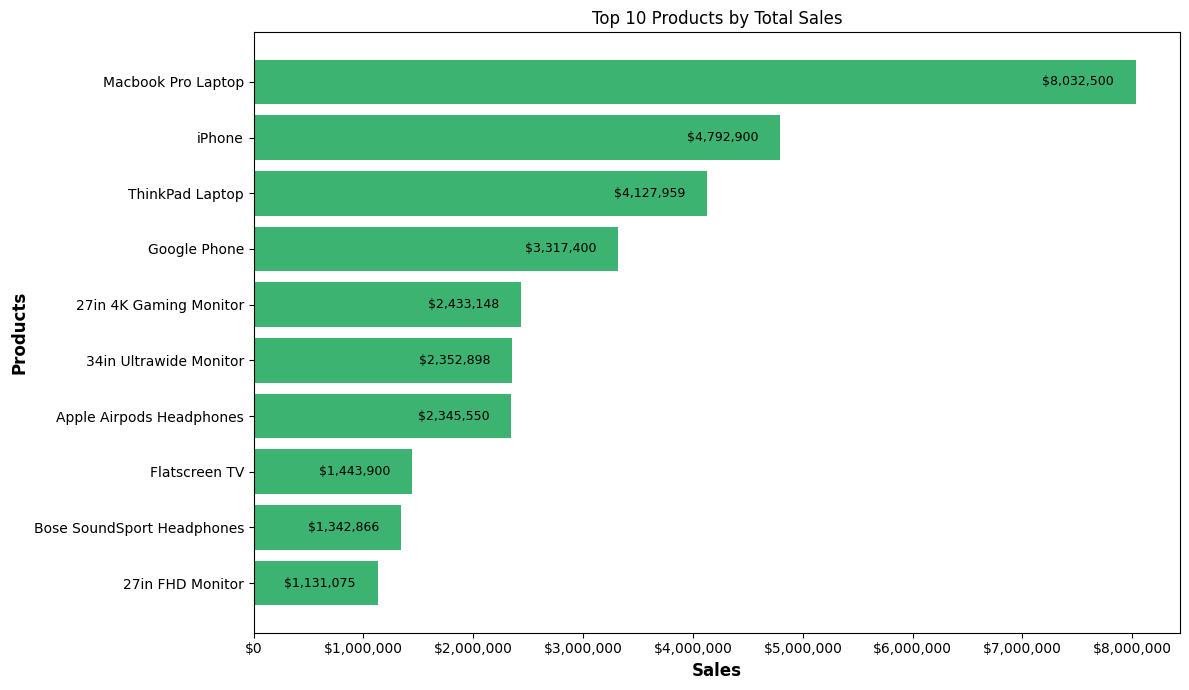

In [33]:
# Top Products

top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
bars = plt.barh(top_products.index[::-1], top_products.values[::-1], color='mediumseagreen')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Sales', fontsize=12 ,fontweight='bold')
plt.ylabel('Products', fontsize=12 ,fontweight='bold')

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))


for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 200000,
        bar.get_y() + bar.get_height() / 2,
        f"${width:,.0f}",
        va='center',
        ha='right',
        fontsize=9,
        color='black'
    )
plt.tight_layout()
plt.savefig('../visuals/top_products_by_total_sales.png', dpi=600, bbox_inches='tight')
plt.show()

###  **Top Sales by City**

This bar chart ranks cities by their total sales volume:

- **San Francisco** leads significantly, followed by **Los Angeles** and **New York City**, forming the top-tier markets.
- **Boston**, **Atlanta**, and **Dallas** make up the mid-range cities with solid performance.
- **Seattle**, **Portland**, and **Austin** round out the bottom tier in total sales.

---
**Business Insight:**  
Sales are strongest in major urban and coastal markets, suggesting a strategic focus on these regions for high-revenue campaigns, inventory allocation, and regional promotions.


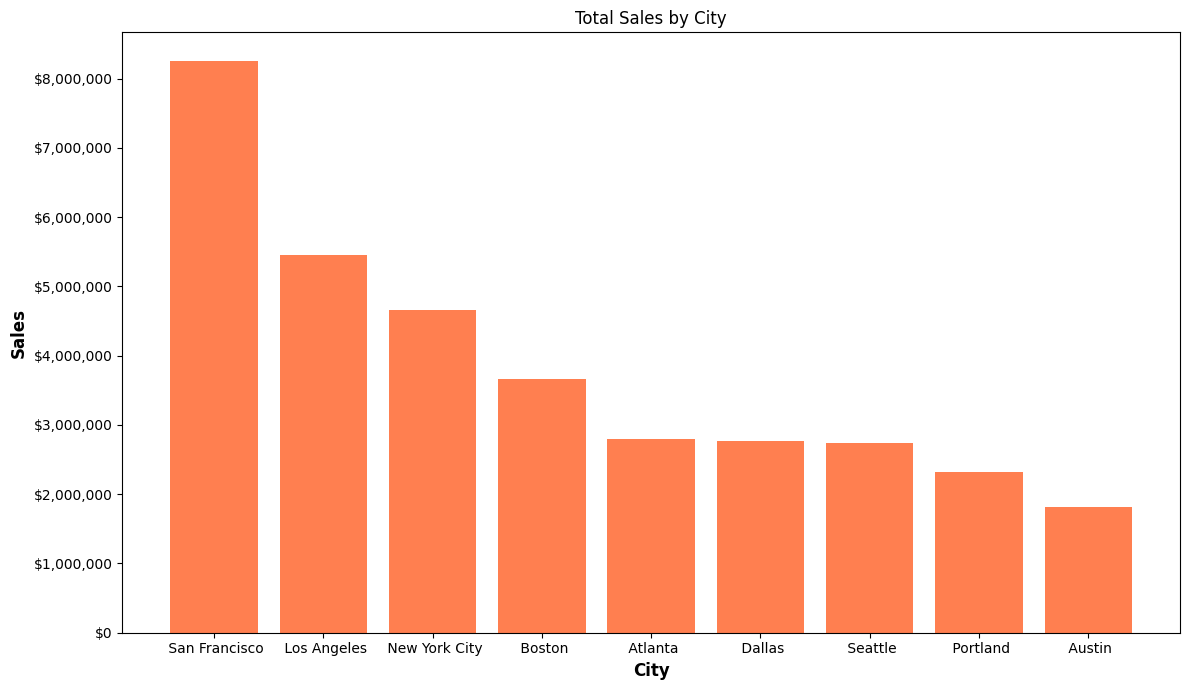

In [34]:
# Total Sales by City

sales_by_city = df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
bars =plt.bar(sales_by_city.index, sales_by_city.values, color='coral')

plt.title('Total Sales by City')
plt.ylabel('Sales', fontsize=12 ,fontweight='bold')
plt.xlabel('City', fontsize=12 ,fontweight='bold')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.savefig('../visuals/total_sales_by_city.png', dpi=600, bbox_inches='tight')
plt.show()

### **Quantity Ordered by Day of the Week**

This chart shows how customer order volume varies across the week:

- **Tuesday** has the highest order volume (30,686), followed closely by **Monday** and **Wednesday**.
- Other days, including **Saturday** and **Sunday**, show relatively stable but slightly lower volumes.
- **Friday** records the lowest, though the difference across all days is minimal.

---
**Business Insight:**  
Order volumes are **evenly distributed throughout the week**, with only slight variation. This indicates **steady demand**, meaning daily operations (e.g., staffing, fulfillment) should remain consistent with only minor adjustments on peak days like Tuesday.

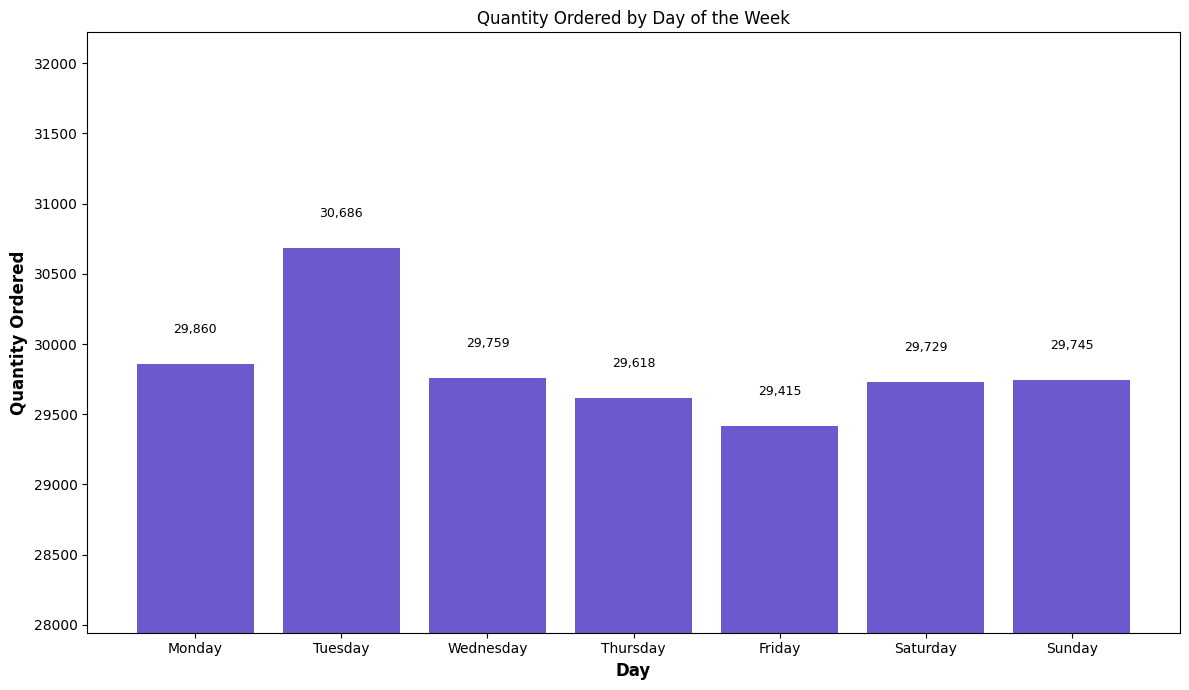

In [35]:
# Quantity Ordered by Day of the Week

quantity_ordered_by_day = df.groupby('day_of_week')['quantity_ordered'].sum()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
quantity_ordered_by_day = quantity_ordered_by_day.reindex(day_order)

plt.figure(figsize=(12, 7))
bars = plt.bar(quantity_ordered_by_day.index, quantity_ordered_by_day.values, color='slateblue')

plt.title('Quantity Ordered by Day of the Week')
plt.ylabel('Quantity Ordered', fontsize=12, fontweight='bold')
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylim(quantity_ordered_by_day.min() * 0.95, quantity_ordered_by_day.max() * 1.05)

# 🔽 Add annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 200,  # Slightly above the bar
        f"{int(height):,}",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

plt.tight_layout()
plt.savefig('../visuals/quantity_ordered_by_day_of_week.png', dpi=600, bbox_inches='tight')
plt.show()


### **Top Product by City**

This horizontal bar chart presents the highest-selling product in each major city, ranked by total revenue.

- The **MacBook Pro Laptop** is the top product in **all cities**, with the highest sales recorded in **San Francisco**, followed by **Los Angeles** and **New York City**.

- The consistent dominance of this premium item across regions reflects strong demand for high-end electronics.
---

**Business Insight:**  
The MacBook Pro's widespread popularity suggests that urban consumers are willing to invest in premium devices. Businesses can capitalize on this by offering complementary accessories, exclusive promotions, and tailored marketing for high-performing cities.

> Note: *State-level analysis was also conducted and showed the same result — the MacBook Pro Laptop ranked as the top-selling product in every state. As it provided no additional insights, a separate visualization was not included.*


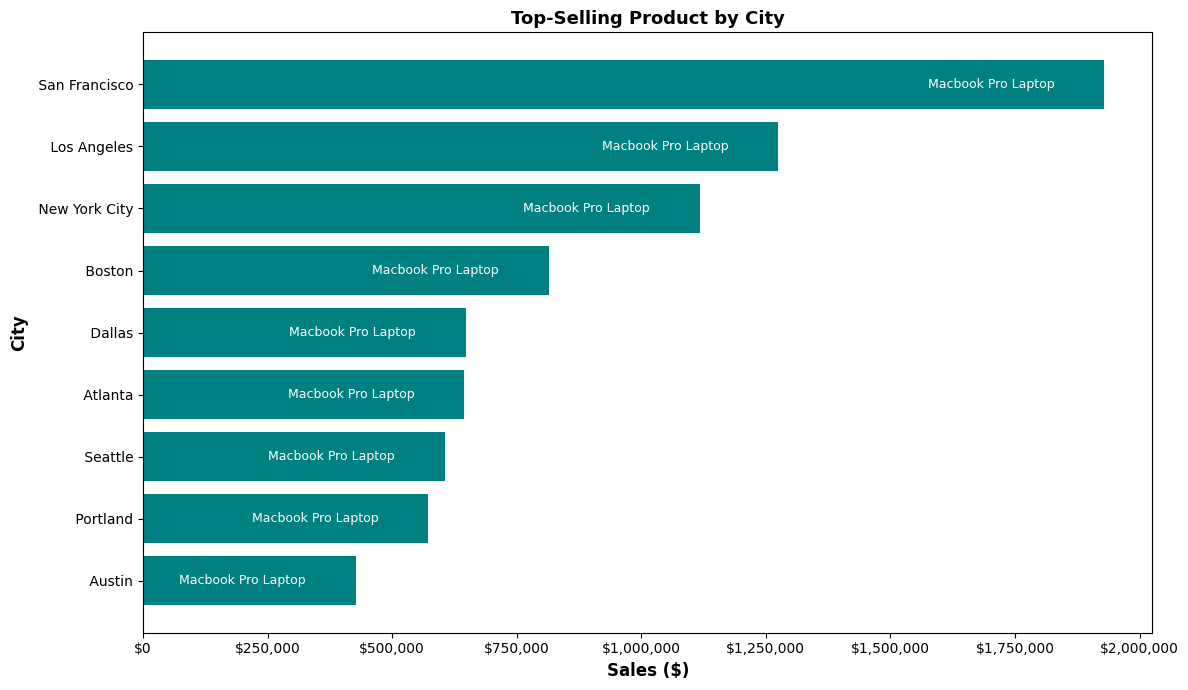

In [36]:
# Top Product by City

grouped = df.groupby(['city', 'product'])['sales'].sum().reset_index()

# Get top-selling product in each city
top_product_by_city = grouped.loc[grouped.groupby('city')['sales'].idxmax()].reset_index(drop=True)

# Sort by sales descending
top_product_by_city = top_product_by_city.sort_values(by='sales')

# Bar chart
plt.figure(figsize=(12, 7))
bars = plt.barh(top_product_by_city['city'], top_product_by_city['sales'], color='teal')
plt.title('Top-Selling Product by City', fontsize=13, fontweight='bold')
plt.xlabel('Sales ($)', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')

# Format x-axis as currency
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Add annotations
for bar, product in zip(bars, top_product_by_city['product']):
    width = bar.get_width()
    plt.text(width - 100000, bar.get_y() + bar.get_height()/2, product,
             va='center', ha='right', fontsize=9, color='white')

plt.tight_layout()
plt.savefig('../visuals/top_products_by_city.png', dpi=600, bbox_inches='tight')
plt.show()

### **Monthly Sales Trend per Year**

This line chart shows how monthly sales fluctuated throughout the year, broken down by 2019 and 2020.

---
#### 2019:
- Sales increased steadily from **January to April**, showing a strong early-year trend.
- A **decline followed from May to June**, with a **slight rebound in July**.
- Sales then **dropped significantly through September**.
- A **sharp rise in October** was observed, followed by a **partial dip in November**, and then a **dramatic spike in December**, likely driven by holiday shopping.
---
#### 2020:
- **Only January recorded minimal sales**, with **no sales from February through December**.
- This sharp drop may reflect business disruptions, data gaps, or operational halts during the **COVID-19 pandemic**.
---
**Business Insight:**  
The 2019 trend reveals clear seasonal patterns, with strong performance in Q1 and Q4 — particularly December. The lack of 2020 sales data may point to significant pandemic-related impacts that disrupted normal operations and demand.

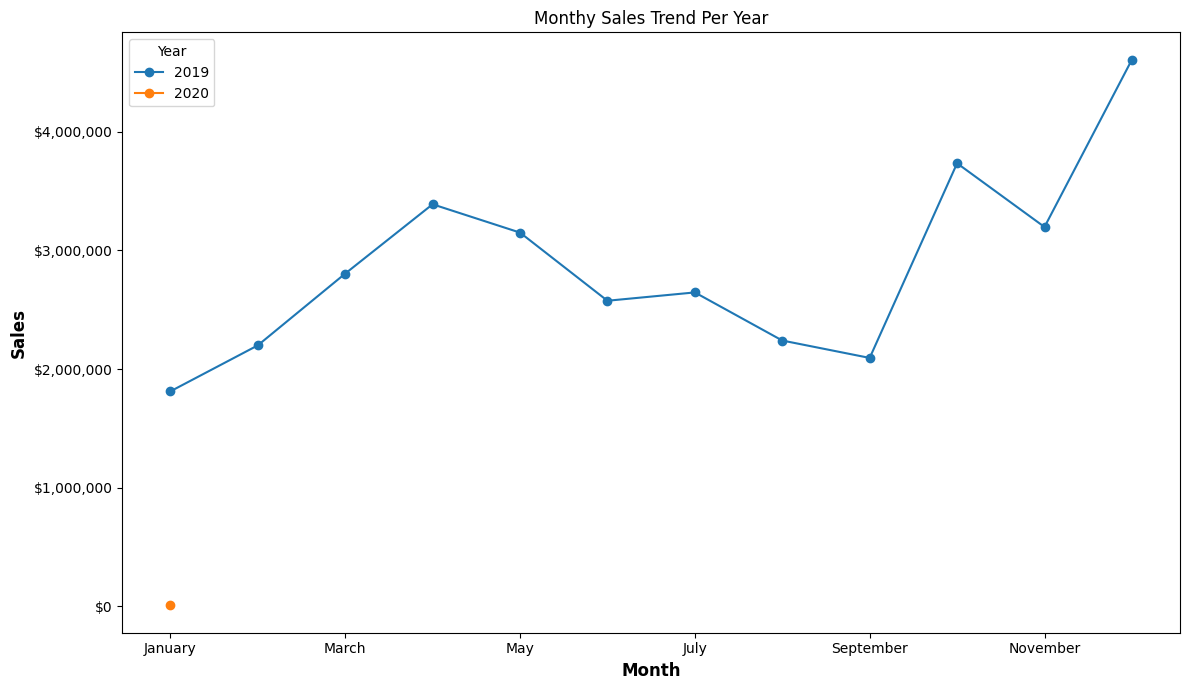

In [37]:
# Monthly Sales per Year

monthly_sales_year = df.groupby(['year', 'month_name'], observed=False)['sales'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales_year['month_name'] = pd.Categorical(monthly_sales_year['month_name'], categories=month_order, ordered=True)

pivot_data = monthly_sales_year.pivot(index='month_name', columns='year', values='sales')

pivot_data.plot(marker='o', figsize=(12, 7))
plt.title('Monthy Sales Trend Per Year')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.legend(title='Year')
plt.tight_layout()
plt.savefig('../visuals/monthly_sales_per_year.png', dpi=600, bbox_inches='tight')
plt.show()

### **Monthly Sales Trend – Top 5 Products in 2019**

This line chart illustrates the monthly sales performance of the top 5 revenue-generating products:

**MacBook Pro Laptop** leads all products in sales, followed by the **iPhone**, **ThinkPad Laptop**, **Google Phone**, and the **27in 4K Gaming Monitor**.

---

#### **Sales Pattern Insight:**

- Sales **gradually rise from January to May**, showing a steady growth phase.
- A **drop occurs in June**, followed by a **small rebound in July**.
- Sales **decline sharply in August and bottom out in September**.
- A **major sales spike happens in October**, followed by a **dip in November**, and then **an explosive jump in December**, likely driven by holiday season demand.

---

**Business Insight:**
- Peak months (October and December) suggest **seasonal promotions and product launches** play a key role in driving high-ticket sales.
- Brands should plan **inventory, marketing, and logistics** around these peaks to maximize revenue opportunities.


<Figure size 1400x800 with 0 Axes>

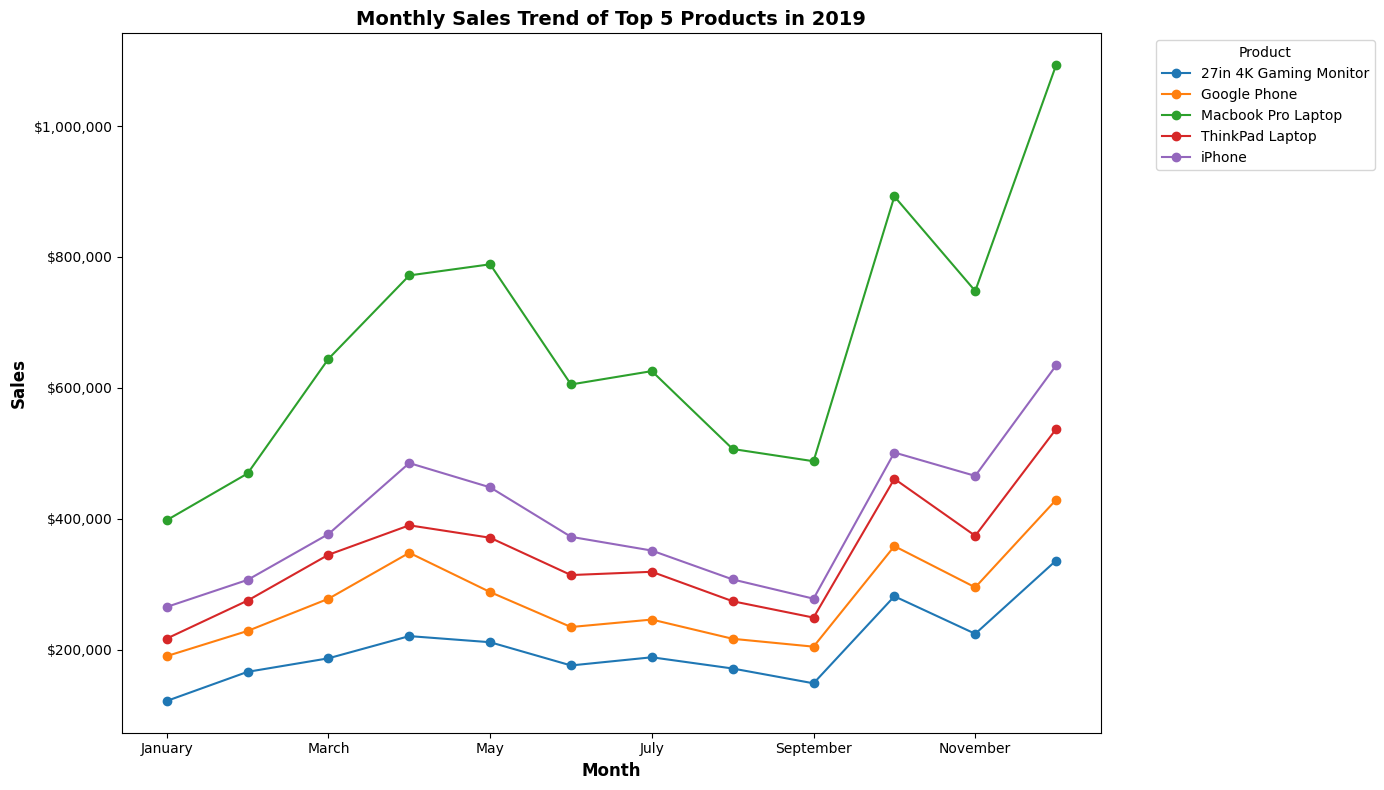

In [38]:
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

df_2019 = df[df['year'] == 2019]

top5_products = df_2019.groupby('product')['sales'].sum().nlargest(5).index

df_top5_2019 = df_2019[df_2019['product'].isin(top5_products)]

# Group by month and product
monthly_product_sales = df_top5_2019.groupby(['month_name', 'product'], observed=True)['sales'].sum().reset_index()

# Pivot for plotting
pivot = monthly_product_sales.pivot(index='month_name', columns='product', values='sales')
pivot = pivot.reindex(month_order)

# Plot
plt.figure(figsize=(14, 8))
pivot.plot(marker='o', figsize=(14, 8))
plt.title('Monthly Sales Trend of Top 5 Products in 2019', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.savefig('../visuals/top_5_products_monthly_sales.png', dpi=600, bbox_inches='tight')
plt.show()

### **Monthly Quantity Ordered Trend – Top 5 Products in 2019**

This line chart shows the order volume trends of the 5 most frequently purchased products:

**AAA Batteries (4-pack)** and **AA Batteries (4-pack)** top the list, followed by **USB-C Charging Cable**, **Lightning Charging Cable**, and **Wired Headphones** — all small, essential tech accessories with high turnover.

---

#### **Demand Pattern Insight:**

- **Consistent increase** in orders from **January to April**, reflecting rising early-year demand.
- A noticeable **decline in May and June**, possibly due to seasonal factors or spending slowdowns.
- **Slight recovery in July**, but quantity **drops sharply through September**.
- The trend then **repeats from October to December**, with **strong recovery in December**, indicating possible holiday-driven purchases.

---

**Business Insight:**
- These patterns suggest a need for **early-year stock preparation** and **end-of-year promotional planning**.
- Retailers can optimize sales by bundling or discounting these high-volume products around **Q1 and Q4 peaks**.


<Figure size 1400x800 with 0 Axes>

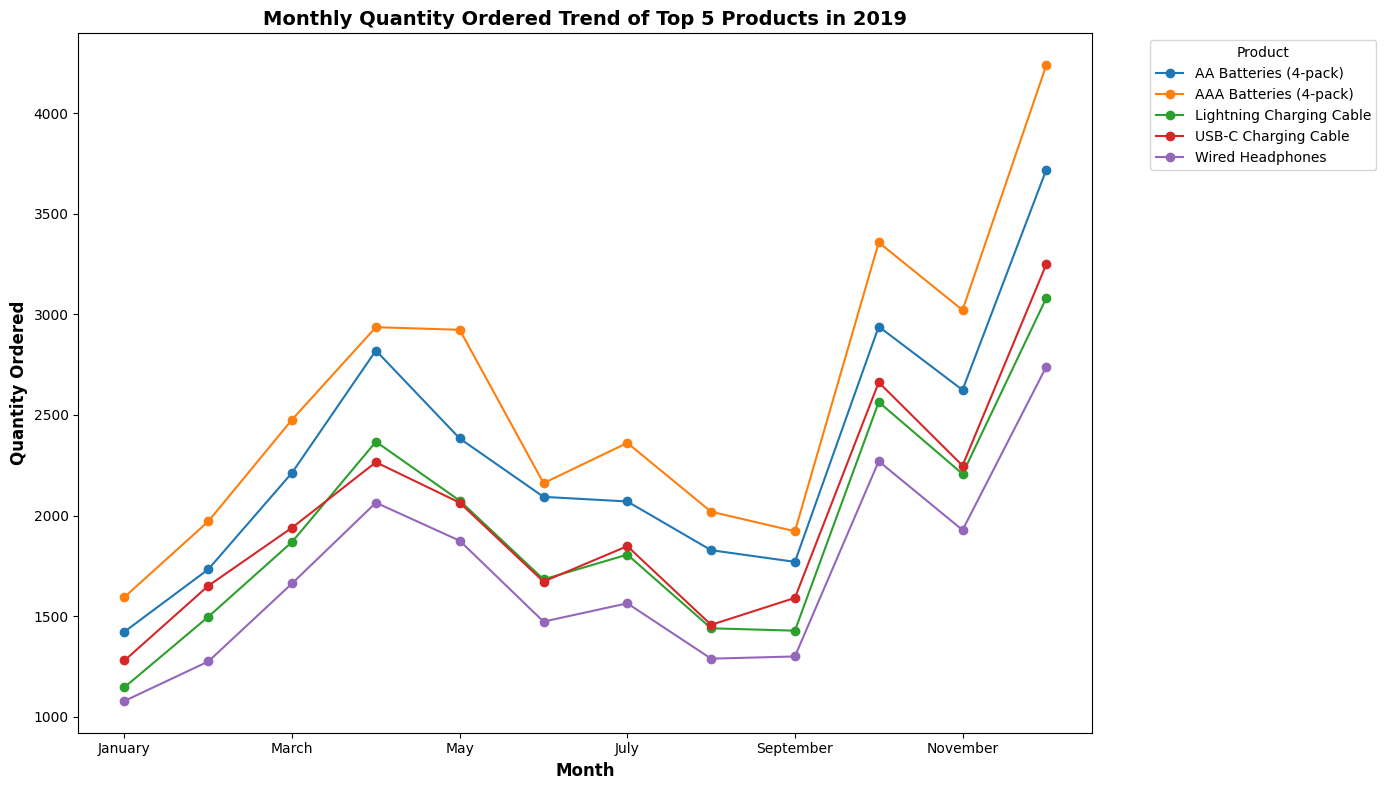

In [39]:
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

df_2019 = df[df['year'] == 2019]

top5_products_qty = df_2019.groupby('product')['quantity_ordered'].sum().nlargest(5).index

df_top5_qty_2019 = df_2019[df_2019['product'].isin(top5_products_qty)]

# Group by month and product, and sum quantity ordered
monthly_qty_trend = df_top5_qty_2019.groupby(['month_name', 'product'], observed=True)['quantity_ordered'].sum().reset_index()

# Pivot for line plot
pivot_qty = monthly_qty_trend.pivot(index='month_name', columns='product', values='quantity_ordered')
pivot_qty = pivot_qty.reindex(month_order)

# Plot
plt.figure(figsize=(14, 8))
pivot_qty.plot(marker='o', figsize=(14, 8))
plt.title('Monthly Quantity Ordered Trend of Top 5 Products in 2019', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Quantity Ordered', fontsize=12, fontweight='bold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('../visuals/top_5_products_monthly_quantity_ordered.png', dpi=600, bbox_inches='tight')
plt.show()

---

## **EDA Summary & Key Insights**
The Exploratory Data Analysis provided valuable insights into sales trends, product performance, and customer behavior. Key findings include:

- **December consistently records the highest sales**, suggesting strong year-end demand.
- **MacBook Pro Laptop dominates across all cities**, reflecting a premium product preference.
- **Top-selling products by quantity** are essential, low-cost accessories (e.g., batteries and charging cables), indicating frequent repurchasing behavior.
- **Weekday sales volumes are relatively stable**, with slight peaks mid-week and lower activity on Fridays.
- **City-level sales highlight San Francisco, Los Angeles, and New York City** as the strongest markets.

These findings establish a foundation for targeted business strategies in marketing, inventory planning, and geographic prioritization. The next step involves visualizing these trends in an interactive dashboard to enhance decision-making.

---